# OpenCV basics

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cv2.__version__

'4.1.2'

In [3]:
image = cv2.imread('images/sample1.jpg')
image.size #shows the total pixels of an image

7998000

In [4]:
image #stores image as an array of pixels

array([[[185, 163, 145],
        [155, 135, 117],
        [142, 123, 102],
        ...,
        [ 13,  20,  15],
        [ 24,  35,  25],
        [ 36,  54,  41]],

       [[202, 178, 160],
        [167, 143, 125],
        [166, 141, 125],
        ...,
        [ 26,  44,  31],
        [ 52,  81,  66],
        [ 23,  37,  26]],

       [[183, 152, 137],
        [192, 163, 148],
        [183, 157, 141],
        ...,
        [ 57, 103,  81],
        [ 48,  79,  64],
        [ 15,  20,  18]],

       ...,

       [[174, 145, 131],
        [215, 189, 172],
        [156, 134, 116],
        ...,
        [100,  81,  60],
        [120, 101,  80],
        [ 95,  79,  56]],

       [[146, 126, 108],
        [ 96,  78,  61],
        [ 96,  76,  59],
        ...,
        [ 97,  80,  61],
        [ 76,  60,  37],
        [ 83,  69,  41]],

       [[108,  98,  74],
        [ 49,  34,  15],
        [ 95,  72,  56],
        ...,
        [108,  89,  68],
        [107,  92,  66],
        [ 99,  85,  56]]

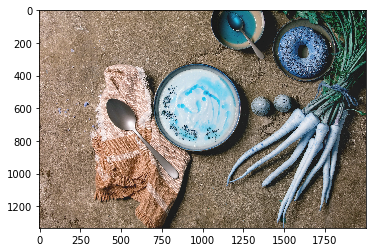

In [5]:
plt.imshow(image)  #Shows BGR form of image, not original (need to convert to RGB for that)

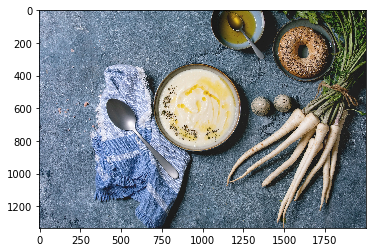

In [6]:
#convert to rgb image (i.e. original RGB)
rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)

In [7]:
rand_img = np.random.randint(0,255, (100,100,3))
rand_img_gray = np.random.randint(0,255,(100,100)) #remove the 3 as grayscale lacks this

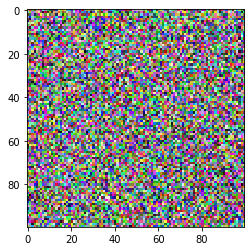

In [8]:
plt.imshow(rand_img)

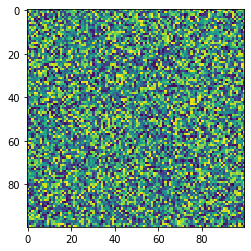

In [9]:
plt.imshow(rand_img_gray)  #without the value of red from RGB

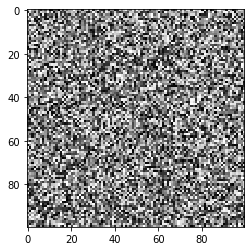

In [10]:
plt.imshow(rand_img_gray, cmap = 'gray') #grayscale

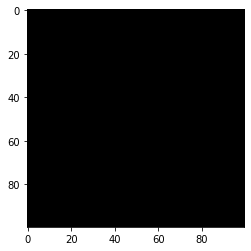

In [11]:
black = np.ones((100,100)) #both (0,0) and (100,100) gives same image as shown below
plt.imshow(black)
plt.imshow(black, cmap ='gray')

In [12]:
black = np.repeat(255,100*100).reshape(100,100)/255

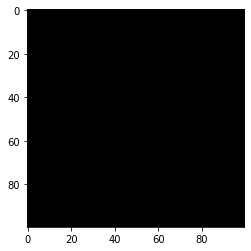

In [13]:
plt.imshow(black, cmap='gray', vmax=255, vmin=0)

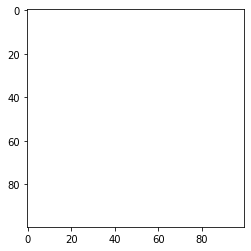

In [14]:
white = np.repeat(255, 100*100).reshape(100,100)/255
plt.imshow(white, cmap='gray', vmax=1, vmin=0)

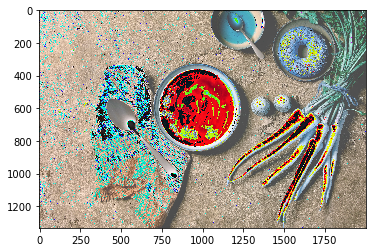

In [15]:
edited = 1*image + 50  # g(x) = c*image + b; c = contrast, b = brightness
plt.imshow(edited)

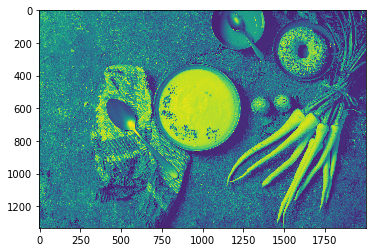

In [16]:
plt.imshow(image[:,:,2])  #shows specific channel of image

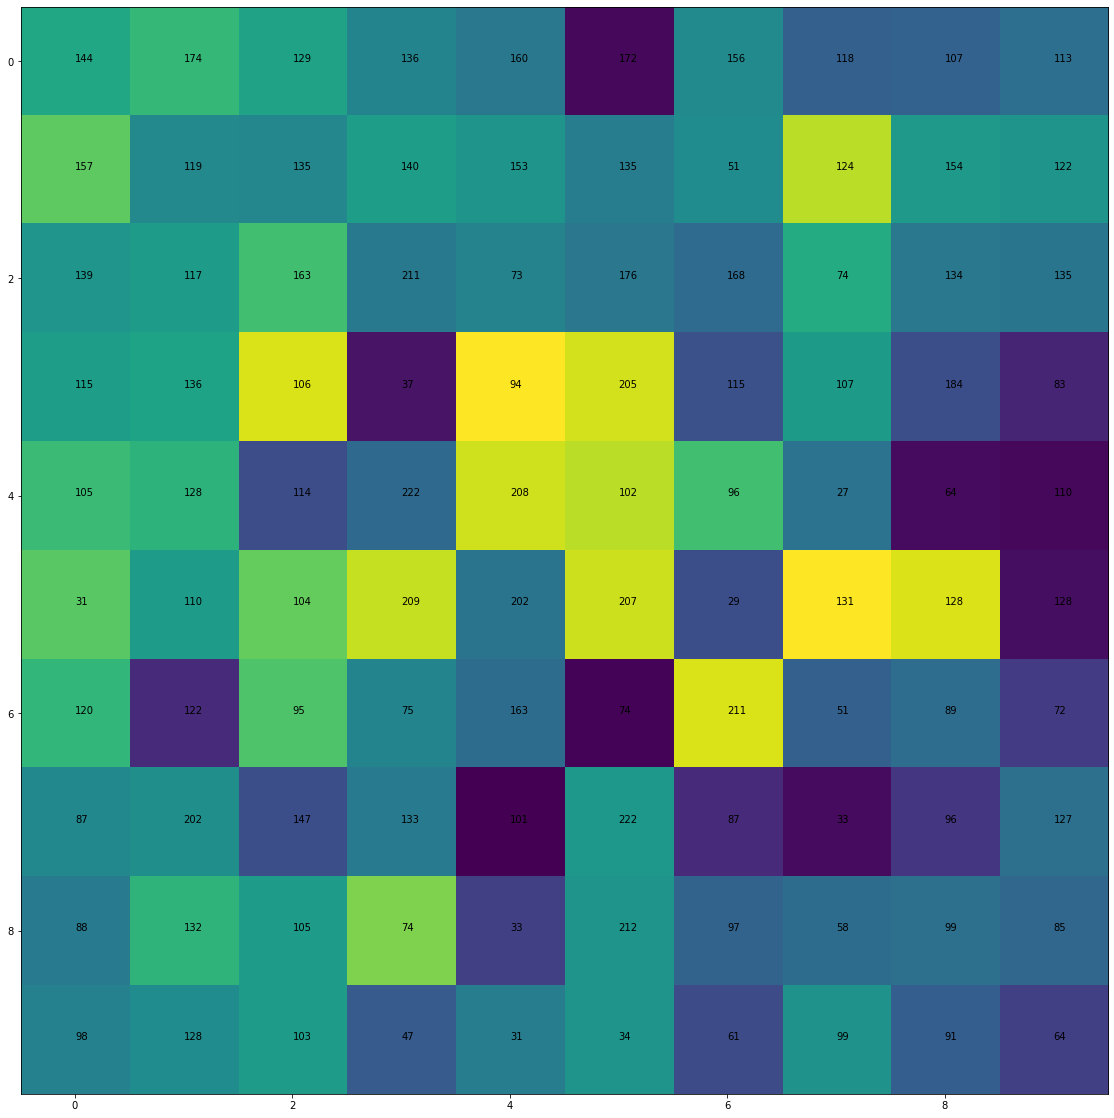

In [17]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.resize(gray, (10,10))

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)

r = 0

for rows in gray:
    c = 0
    for pixel in rows:
        ax.annotate(pixel, xy = (r,c))
        c+=1 #c=c+1
    r+=1
ax.imshow(gray)
plt.show()

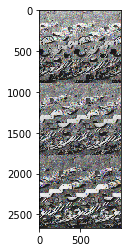

In [18]:
plt.imshow(image.T.reshape(-1,1000,3))  # verify if right or wrong

In [19]:
# edge detection using filters (kernels)

#sobel_x for horizontal line, sobel_y for vertical line
sobel_x = np.array([[-1,2,-1],
                    [0,0,0],
                    [-1,2,-1]])
sobel_y = sobel_x.T

edge_kernel = np.array([[0,1,0],
                        [1,-4,1],
                        [0,1,0]])         

sharpen_kernel = np.array([[0,-1,0],
                        [-1,5,-1],
                        [0,1,0]])

gaussian_blur = np.array([[1/16,2/16,1/16],
                        [2/16,4/16,2/16],
                        [1/16,2/16,1/16]])

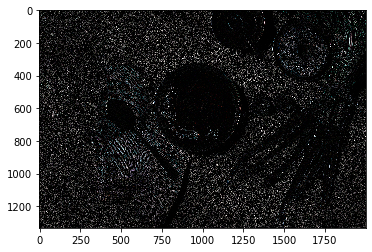

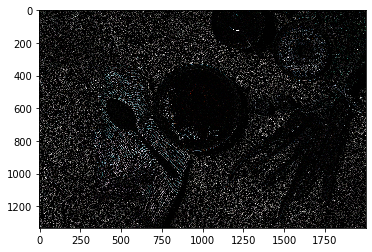

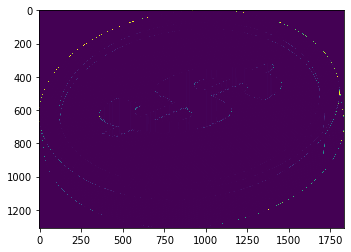

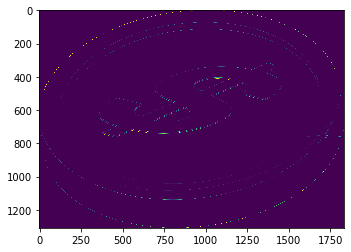

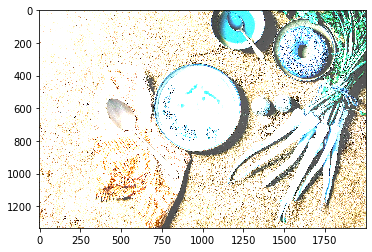

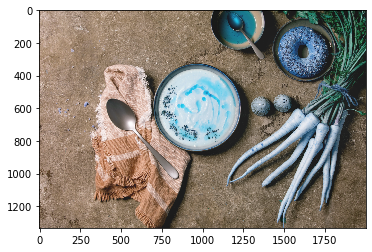

In [20]:
# showing sobel filtered image of sample images 
coin = cv2.imread('images/coin.png',0)
#plt.imshow(coin)

filtered_img = cv2.filter2D(image, -1, sobel_x)
plt.imshow(filtered_img)
plt.show()

filtered_img = cv2.filter2D(image, -1, sobel_y)
plt.imshow(filtered_img)
plt.show()

filtered_img = cv2.filter2D(coin, -1, sobel_x)
plt.imshow(filtered_img)
plt.show()

filtered_img = cv2.filter2D(coin, -1, sobel_y)
plt.imshow(filtered_img)
plt.show()

filtered_img = cv2.filter2D(image, -1, sharpen_kernel)
plt.imshow(filtered_img)
plt.show()

filtered_img = cv2.filter2D(image, -1, gaussian_blur)
plt.imshow(filtered_img)

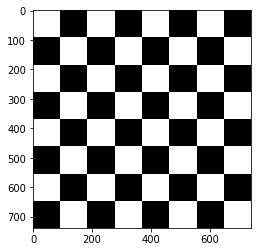

In [21]:
#Using sobel filtering on chessboard.
chessboard = cv2.imread('images/chessboard.png')
plt.imshow(chessboard)

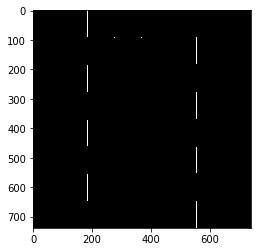

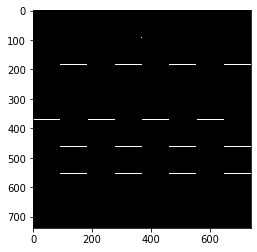

In [22]:
filtered_chessboard_x = cv2.filter2D(chessboard, -1, sobel_x)
plt.imshow(filtered_chessboard_x)
plt.show()

filtered_chessboard_y = cv2.filter2D(chessboard, -1, sobel_y)
plt.imshow(filtered_chessboard_y)
plt.show()

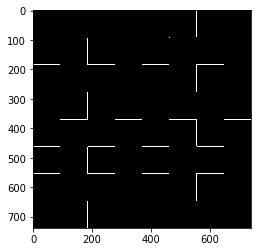

In [23]:
#testing custom filters
custom_filter = np.array([[2,-1,0],
                         [-1,0,-1],
                         [0,-1,2]])
filtered = cv2.filter2D(chessboard, -1, custom_filter)
plt.imshow(filtered)